# TP1: Manipulation des données sous PYTHON

Utilisation du package `pandas`


## Objectifs du TP

Un préalable à l’utilisation d’algorithmes d’apprentissage statistique
est le chargement, la mise en forme et l’analyse de base de données. Le
package `pandas` de `Python` met à dispostion un ensemble de structures
de données et d’outils très pratiques permettant cela. L’objectif de ce
TP est de se familiariser avec ces stuctures et outils.

In [205]:
import pandas as pds
import numpy as np
import os
import matplotlib.pyplot as plt

## Liste des fonctions que nous utiliserons

Ci-dessous $s$ représente une liste et $t$ un tableau à 2 dimensions

| Fonction | Description |
|:---------|:-------------|
|`s = Series(data, index)`|Creation d’une liste indexée |
|`t = DataFrame(data, index, columns)`|Creation d’un tableau à 2 dimensions|
|`s.index` or `t.index`|Renvoie l’index de `s` ou de `t`|
|`s.values`|Renvoie la liste des valeurs de `s`|
|`t = read_csv(’fichier.csv’)`|Charge une base contenue dans `fichier.csv` dans `t`|
|`random.permutation(x)`|Si `x` est entier, crée une séquence aléatoire d’entiers entre 1 et `x`|
|`random.choice(a,size,replace)`|Génère un échantillon aléatoire d’éléments de `a`|avec (`replace=True`) ou sans remise (`replace`=False)|
|`t.drop(label,axis)`|Crée un DataFrame à partir de `t` dont les lignes (axis=0)|ou les colonnes (axis=1) spécifiées dans `label` ont été supprimées|
|`t.duplicated()`|Renvoie la liste des doublons de lignes|
|`t.replace(value1,value2)`|Remplace `value1` par `value2` dans `t`|
|`t.fillna(value)`|Remplace les valeurs manquantes `nan` par `value`|
|`t.dropna(axis)`|Supprime les lignes (axis=0) ou les colonnes (axis=1)|avec valeurs manquantes|
|`t.describe()`|Affiche des statistiques sur `t`|
|`t.mean(axis)`|Renvoie la valeur moyenne selon l’axe précisé (0 ou 1)|
|`t.min(axis)`|Renvoie la valeur mini selon l’axe précisé (0 ou 1)|
|`t.max(axis)`|Renvoie la valeur maxi selon l’axe précisé (0 ou 1)|
|`t.value_counts()`|Renvoie le nombre de valeurs unique de `t`|
|`s.hist()`|Affiche l’histogramme des valeurs de `s`|
|`t.crosstab(column1,column2)`|Calcule et affiche le tableau de contingence des 2 variables de `t`|

## 1 - La structure de données `Series`

Le package `pandas` propose une structure pour gérer les listes
d’objets. Il s’agit d’un tableau à deux colonnes dont la première
colonne correspond aux indices et la deuxième aux valeurs
correspondantes.

(a) Créer un objet de type `Series` contenant la liste suivante:

|`crab` | `deer` | `hamster` | `dolphin` |
|:-----:|:------:|:---------:|:---------:|

In [49]:
s = pds.Series(['crab','deer','hamster','dolphin'])
s

0       crab
1       deer
2    hamster
3    dolphin
dtype: object

(b) Faire afficher à l’écran la liste des index de cette liste avec la fonction `s.index`

In [50]:
np.arange(s.index.stop - s.index.start)

array([0, 1, 2, 3])

(c) Sélectionner à l’écran l’élément de la liste dont l’index est 2

In [51]:
s[2]

'hamster'

(d) Faire afficher à l’écran l’index de l’élément est `deer`

In [52]:
np.argwhere( (s.where(s.values=='deer')==s).values )

array([[1]], dtype=int64)

(e) Modifier les index de la liste pour qu’ils soient maintenant: `’a’,’b’,’c’,’d’`

In [53]:
s.index=['a','b','c','d']
s

a       crab
b       deer
c    hamster
d    dolphin
dtype: object

## 2 - La structure de données `DataFrame`

La deuxième structure proposée par `pandas` permet de gérer des tableaux
de données. C’est donc un tableau à 2 dimensions avec des index de
lignes et colonnes. L’index de colonnes correspond aux noms des
variables de la base de données et l’index des lignes correspond aux
différents individus de la population que représente la base.

(a) Créer un objet de type `DataFrame` contenant les données suivantes:

|  _Animal_ | **Aquatic** | **Tail** |
|:---------:|:-----------:|:--------:|
|**crab**   |     True    |  False   |
|**deer**   |     False   |  True    |
|**hamster**|     False   |  True    |
|**dolphin**|     True    |  False   |

In [62]:
d = {'Animal':s.values,'Aquatic':[True,False,False,True],'Tail':[False,True,True,False]}
t = pds.DataFrame(d).set_index('Animal')

(b) Faire afficher à l’écran la liste des index de cette base avec la fonction `t.index`


In [63]:
t.index

Index(['crab', 'deer', 'hamster', 'dolphin'], dtype='object', name='Animal')

(c) Faire afficher à l’écran la liste des colonnes (variables) de la base avec la fonction `t.columns`

In [64]:
t.columns

Index(['Aquatic', 'Tail'], dtype='object')

(d) Faire afficher à l’écran les valeurs des variables de la ligne `deer`

In [66]:
t[t.index=='deer']

,Aquatic,Tail
Animal,,
deer,False,True


(e) Créer une `DataFrame` qui contiendra uniquement les animaux “aquatiques”

In [69]:
aqua = t[t.Aquatic]
aqua

,Aquatic,Tail
Animal,,
crab,True,False
dolphin,True,False


## 3 - Chargement de données à partir d’un fichier `.csv`

(a) Charger dans une `DataFrame` la base de données `zoo` à partir du
    fichier `.csv` disponible sur Moodle

In [84]:
zoo = pds.read_csv((os.path.join("data", "zoo.csv")))
zoo

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,True,False,False,True,False,False,False,True,True,True,False,False,2,True,False,True,mammal
97,wasp,True,False,True,False,True,False,False,False,False,True,True,False,6,False,False,False,insect
98,wolf,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
99,worm,False,False,True,False,False,False,False,False,False,True,False,False,0,False,False,False,invertebrate


(b) Faire afficher la liste des variables de la base

In [85]:
zoo.columns

Index(['animal', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
       'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
       'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

## 4 - Sélection de données

(a) Créer une fonction `Melange(t)` qui prendra en paramètre une DataFrame `t` et renverra la DataFrame dont les lignes ont été mélangées aléatoirement. Tester sur la base `zoo`.

In [86]:
def Melange(t):
    return t.reindex(np.random.choice( t.shape[0], size = t.shape[0] ))
Melange(zoo)

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
85,starfish,False,False,True,False,False,True,True,False,False,False,False,False,5,False,False,False,invertebrate
24,flea,False,False,True,False,False,False,False,False,False,True,False,False,6,False,False,False,insect
68,pussycat,True,False,False,True,False,False,True,True,True,True,False,False,4,True,True,True,mammal
69,raccoon,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
71,rhea,False,True,True,False,False,False,True,False,True,True,False,False,2,True,False,True,bird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,gorilla,True,False,False,True,False,False,False,True,True,True,False,False,2,False,False,True,mammal
83,sparrow,False,True,True,False,True,False,False,False,True,True,False,False,2,True,False,False,bird
77,seawasp,False,False,True,False,False,True,True,False,False,False,True,False,0,False,False,False,invertebrate
47,lynx,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


(b) Créer un script `Tirage1(t,n)` qui prendra en paramètre une DataFrame `t` et un entier `n` et renverra une DataFrame contenant $n$ lignes de `t` tirées aléatoirement (avec remise). Tester sur la base `zoo`.

In [130]:
def Tirage1(t,n):
    k = np.random.choice( t.shape[0], size = n )
    return t.iloc[k]
    
t1 = Tirage1(zoo.loc[:20,:],8)
t1

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
5,buffalo,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
5,buffalo,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
11,chicken,False,True,True,False,True,False,False,False,True,True,False,False,2,True,True,False,bird
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
20,dove,False,True,True,False,True,False,False,False,True,True,False,False,2,True,True,False,bird
9,cavy,True,False,False,True,False,False,False,True,True,True,False,False,4,False,True,False,mammal


(c) Créer une variante `Tirage2(t,n)` avec tirage sans remise.

In [131]:
def Tirage2(t,n):
    k = np.random.choice( t.shape[0], size = n , replace=False )
    return t.iloc[k]

t2 = Tirage2(zoo.loc[:20,:],8)
t2

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
19,dolphin,False,False,False,True,False,True,True,True,True,True,False,True,0,True,False,True,mammal
12,chub,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
6,calf,True,False,False,True,False,False,False,True,True,True,False,False,4,True,True,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
15,crayfish,False,False,True,False,False,True,True,False,False,False,False,False,6,False,False,False,invertebrate
7,carp,False,False,True,False,False,True,False,True,True,False,False,True,0,True,True,False,fish
10,cheetah,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


(d) Vérifier dans les 2 cas avec la fonction `t.duplicated` l’existence ou non de doublons de lignes(remise ou non).

In [137]:
sum(t1.duplicated())

2

In [138]:
sum(t2.duplicated())

0

### Suppression et transformation de données

(a) Charger dans une `DataFrame` la base de données `titanic2` à partir du fichier `.csv` disponible sur Moodle:

_Avant de répondre aux questions suivantes, dupliquer votre DataFrame dans une autre DataFrame pour en avoir 2 versions._

In [186]:
titanic = pds.read_csv((os.path.join("data", "titanic.csv")))
titanic_duplicata = titanic.copy()
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [187]:
titanic2 = pds.read_csv((os.path.join("data", "titanic2.csv")))
titanic2_duplicata = titanic2.copy()
titanic2

,Unnamed: 0,class,age,sex,survived
0,1,1st class,adults,man,yes
1,2,1st class,adults,man,yes
2,3,1st class,adults,man,yes
3,4,1st class,adults,man,yes
4,5,1st class,adults,man,yes
...,...,...,...,...,...
1311,1312,3rd class,child,women,no
1312,1313,3rd class,child,women,no
1313,1314,3rd class,child,women,no
1314,1315,3rd class,child,women,no


(b) Afficher les lignes dont la valeur de la variable `class` est `unknown` et supprimer une des lignes avec la fonction `t.drop(index)`. Faire la même chose avec la variable `age`.

In [188]:
titanic2_classunknown = titanic2[titanic2['class']=='unknown']

titanic2_classunknown.drop(np.random.choice( list(titanic2_classunknown.index), size=1 ))

,Unnamed: 0,class,age,sex,survived
22,23,unknown,adults,man,yes
119,120,unknown,adults,man,no
166,167,unknown,adults,man,no
657,658,unknown,adults,man,yes
1036,1037,unknown,adults,man,no
1271,1272,unknown,child,man,no


In [189]:
titanic2_ageunknown = titanic2[titanic2.age =='unknown']

titanic2_ageunknown.drop(np.random.choice( list(titanic2_ageunknown.index), size=1 ))

,Unnamed: 0,class,age,sex,survived
121,122,1st class,unknown,man,no
341,342,2nd class,unknown,man,no
594,595,2nd class,unknown,man,yes
1117,1118,3rd class,unknown,women,yes


(c) Pour éviter de le faire sur l’ensemble des lignes une à une, on utilisera plutôt la gestion de données manquantes de `pandas`. Pour cela, à l’aide de la fonction `replace`, on remplacera l’ensemble des variables `unknown` par la valeur `nan` reconnue par `pandas`.

In [190]:
titanic2 = titanic2.replace('unknown',np.nan)

(d) Supprimer les lignes contenant les valeurs manquantes avec la fonction `dropna(axis=0)`

In [191]:
titanic2 = titanic2.dropna()
titanic2

,Unnamed: 0,class,age,sex,survived
0,1,1st class,adults,man,yes
1,2,1st class,adults,man,yes
2,3,1st class,adults,man,yes
3,4,1st class,adults,man,yes
4,5,1st class,adults,man,yes
...,...,...,...,...,...
1311,1312,3rd class,child,women,no
1312,1313,3rd class,child,women,no
1313,1314,3rd class,child,women,no
1314,1315,3rd class,child,women,no


(e) Avec la deuxième version de la DataFrame, utiliser la fonction `fillna` pour remplacer les valeurs manquantes “nan” par leur valeur la plus fréquente.

In [193]:
titanic2_duplicata = titanic2_duplicata.fillna(np.nan)
titanic2_duplicata

,Unnamed: 0,class,age,sex,survived
0,1,1st class,adults,man,yes
1,2,1st class,adults,man,yes
2,3,1st class,adults,man,yes
3,4,1st class,adults,man,yes
4,5,1st class,adults,man,yes
...,...,...,...,...,...
1311,1312,3rd class,child,women,no
1312,1313,3rd class,child,women,no
1313,1314,3rd class,child,women,no
1314,1315,3rd class,child,women,no


### Statistiques descriptives élémentaires

(a) Charger dans une `DataFrame` la base de données `cancer` à partir du fichier `.csv` disponible sur Moodle.

In [214]:
cancer = pds.read_csv((os.path.join("data", "cancer.csv")))
cancer

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,benign
695,2,1,1,1,2,1.0,1,1,1,benign
696,5,10,10,3,7,3.0,8,10,2,malignant
697,4,8,6,4,3,4.0,10,6,1,malignant


(b) Utiliser les fonctions `describe()`, `mean()`, `min()`, `max()`, `value_counts()` pour afficher un certain nombre de statistiques descriptives sur la base de données

In [195]:
cancer.describe()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [196]:
cancer.mean()

Clump_Thickness          4.417740
Cell_Size_Uniformity     3.134478
Cell_Shape_Uniformity    3.207439
Marginal_Adhesion        2.806867
Single_Epi_Cell_Size     3.216023
Bare_Nuclei              3.544656
Bland_Chromatin          3.437768
Normal_Nucleoli          2.866953
Mitoses                  1.589413
dtype: float64

In [197]:
cancer.min()

Clump_Thickness               1
Cell_Size_Uniformity          1
Cell_Shape_Uniformity         1
Marginal_Adhesion             1
Single_Epi_Cell_Size          1
Bare_Nuclei                   1
Bland_Chromatin               1
Normal_Nucleoli               1
Mitoses                       1
Class                    benign
dtype: object

In [198]:
cancer.max()

Clump_Thickness                 10
Cell_Size_Uniformity            10
Cell_Shape_Uniformity           10
Marginal_Adhesion               10
Single_Epi_Cell_Size            10
Bare_Nuclei                     10
Bland_Chromatin                 10
Normal_Nucleoli                 10
Mitoses                         10
Class                    malignant
dtype: object

In [202]:
cancer.count()

Clump_Thickness          699
Cell_Size_Uniformity     699
Cell_Shape_Uniformity    699
Marginal_Adhesion        699
Single_Epi_Cell_Size     699
Bare_Nuclei              683
Bland_Chromatin          699
Normal_Nucleoli          699
Mitoses                  699
Class                    699
dtype: int64

(c) Utiliser la fonction `hist()` du package `pyplot` pour afficher l’histogramme des valeurs de la variable `Clump_Thickness`.

(array([145.,  50., 108.,  80., 130.,  34.,  23.,  46.,  14.,  69.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

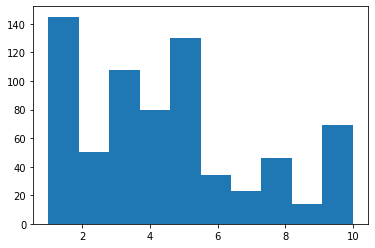

In [207]:
plt.hist(cancer.Clump_Thickness)

(d) Utiliser la fonction `scatter()` pour afficher la variable `Cell_Size_Uniformity` en fonction de la variable `Cell_Shape_Uniformity` et étudier la corrélation des 2 variables

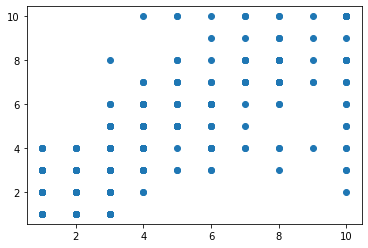

In [210]:
plt.scatter(cancer.Cell_Size_Uniformity, cancer.Cell_Shape_Uniformity)

C:\Users\KU\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.
  import sys


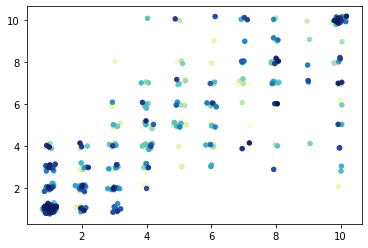

In [211]:
def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(o, u, s=20, marker='o', cmap="YlGnBu", norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    c=np.arange(len(o))
    return plt.scatter(rand_jitter(o), rand_jitter(u), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, verts=verts, **kwargs)

jitter(cancer.Cell_Size_Uniformity, cancer.Cell_Shape_Uniformity)

(e) A l’aide de la fonction `crosstab`, afficher la table de contingence des variables `Mitoses` et `class`

In [219]:
pds.crosstab(cancer.Mitoses,cancer.Class)

Class,benign,malignant
Mitoses,,
1,445,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14
